### Q1

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def get_random_int(n1,n2):
    if n1>n2:
        n1, n2 = n2, n1      # rearrange them if n1>n2
    num_int = (n2 - n1)+1    # number of integers (including, n1 and n2)
    p = np.random.rand()     # generate a random number
    return int(p*num_int)+n1 # return the desired integer

In [15]:
get_random_int(3,7)

3

### Q2

The probability of a meeting could be calculated by looking at the ratio of area enclosed by two limiting equations ($t_B-t_A = 5$ and $t_A - t_B=10$) to the total area.

So we have, the probability is $1 - \frac{1}{2}(25^2 +20^2)\frac{1}{900} = \frac{31}{72} \approx 0.43056$

In [16]:
def get_meeting_status():
    meeting_status = False
    tA = 30*np.random.rand()
    tB = 30*np.random.rand()
    if tA<tB:
        if tB-tA<5:
            meeting_status = True
    else:
        if tA-tB<10:
            meeting_status = True
    return meeting_status

def Get_probability(trials):
    count = 0
    for i in range(trials):
        if get_meeting_status():
            count += 1
    return count/trials

In [17]:
trials = 100000
actual_answer = 0.43055555555
calculated = Get_probability(trials)
print(' Actual answer = %10.8f\n Calculated value = %10.8f\n Difference = %10.8f'%(actual_answer,calculated,abs(actual_answer-calculated)))

 Actual answer = 0.43055556
 Calculated value = 0.42741000
 Difference = 0.00314556


### Q3

As discussed in the class, the probability $p$ of the needle crossing a line is $\displaystyle\frac{2\ell}{\pi d}$ when $\ell < d.$

For $\ell > d,$ we have 
$\displaystyle p = \frac{2}{\pi}\cos^{-1}\frac{d}{\ell} + \frac{2\ell}{\pi d}\left(1-\sqrt{1-\frac{d^2}{\ell^2}}\right)$

In [18]:
def check_if_crossed(l,x,th):
    # check if the needle crosses the line when the center is at a distance x from the nearest line
    # and the needle makes an angle th w.r.t. the line
    if x <= l*np.sin(th)/2:
        return True
    return False

def get_probability(trials,l,d):
    count = 0
    for i in range(trials):
        x = (d/2)*np.random.rand()
        th = (np.pi/2)*np.random.rand()
        if check_if_crossed(l,x,th):
            count += 1
    return count/trials

In [19]:
l = 0.4
d = 1.0
trials = 100000

calculated = get_probability(trials,l,d)
actual_answer = 2*l/np.pi/d
print(' l<d case:')
print(' Actual answer = %10.8f\n Calculated value = %10.8f\n Difference = %10.8f'%(actual_answer,calculated,abs(actual_answer-calculated)))

l = 1.2
trials = 100000

calculated = get_probability(trials,l,d)
actual_answer = (2/np.pi)*np.arccos(d/l) + (2*l/np.pi/d)*(1 - np.sqrt(1 - d**2/l**2))
print('\n l>d case:')
print(' Actual answer = %10.8f\n Calculated value = %10.8f\n Difference = %10.8f'%(actual_answer,calculated,abs(actual_answer-calculated)))

 l<d case:
 Actual answer = 0.25464791
 Calculated value = 0.25437000
 Difference = 0.00027791

 l>d case:
 Actual answer = 0.71451694
 Calculated value = 0.71653000
 Difference = 0.00201306


### Q4

In [27]:
def take_a_step():
    r = np.random.rand()
    if r>=0.5:
        return 1
    return -1

def get_final_position(steps):
    pos = 0
    for i in range(steps):
        pos += take_a_step()
    return pos

# number of steps
N = 50
# number of walks
N_walks = 100000

Final_position_counts = np.zeros(N+1,dtype=int)
for walk in range(N_walks):
    pos = get_final_position(N)
    array_location = int((pos + N)/2)
    Final_position_counts[array_location] += 1

probability_distribution = Final_position_counts/N_walks

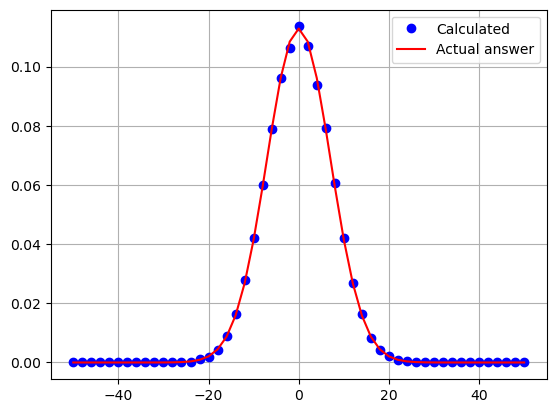

In [32]:
Final_positions = np.arange(-steps, steps+1, step=2)
plt.plot(Final_positions, probability_distribution,'bo',label='Calculated')

actual_answer = 2/np.sqrt(2*np.pi*N)*np.exp(-Final_positions**2/2/N)
plt.plot(Final_positions, actual_answer,'r-',label='Actual answer')
plt.grid()
plt.legend()

### Q5

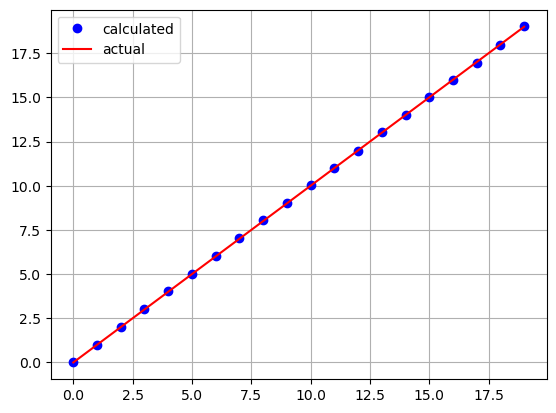

In [36]:
num_walkers = 100000
num_steps = 20

positions = np.zeros(num_walkers, dtype=int)
xaverage = np.zeros(num_steps)
for step in range(num_steps):
    xaverage[step] = sum([i**2 for i in positions])/num_walkers
    for walker in range(num_walkers):
        positions[walker] += take_a_step()
    
steps = [i for i in range(num_steps)]

plt.plot(steps,xaverage,'bo',label='calculated')
plt.grid()
plt.plot(steps, steps, 'r-', label='actual')
plt.legend()